In [ ]:
# Regex expressions:

# \[\[([\w\s]+)\|[\w\s]+\]\] gives first term when structure is [[Full name|nickname]]
# \[\[([\w\s]+)\]\] gives first term when structure is [[Full name]]
# \[\[([\w\s]+\([\w\s]+'[\w\s]+\))\|[\w\s]+\]\] gives first term when structure is [[Full name (relation with ')|name]]
# \[\[([\w\s]+\([\w\s]+[\w\s]+\))\|[\w\s]+\]\] gives first term when structure is [[Full name (relation)|name]]

In [12]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import re

In [4]:
df_characters = pd.read_csv("/work/socialgraph-witcher-analysis/data/characters.csv")
df_characters.head()

,pageid,title
0,8046,Innkeeper
1,5069,The Witcher journal character entries
2,2478,Abigail
3,53882,Adalbert (soldier)
4,2210,Adam (Murky Waters)


In [ ]:
# Race = \[\[(.+)\]\]
# Gender = (\w+)
# Nationality = \{\{(.+)\}\}
# Family = \[\[(.+)\]\]
# Profession = \[\[\w+\]\]\<\w+\>\[\[(.+)\|.+\]\] #To match Ciri
# Profession = \[\[(\w+)\]\] #First profession
# Profession = \[\[(\w+)\]\]\<\w+\>\[\[(\w+)\]\] #Second prof if first is link
# Profession = \w+\<\w+\>\[\[(\w+)\]\] # Second prof if first is not link
# Profession = (\w+) #First prof if it is not a link

# matchRace = re.findall(r'Race = \[\[(.+)\]\]', text, re.IGNORECASE)
# matchGender = re.findall(r'Gender = (\w+)', text, re.IGNORECASE)
# matchNatio = re.findall(r'Nationality = \{\{(.+)\}\}', text, re.IGNORECASE)
# matchFam = re.findall(r'Family = \[\[(.+)\]\]', text, re.IGNORECASE)
# matchProf = re.findall(r'Profession = \[\[\w+\]\]\<\w+\>\[\[(.+)\|.+\]\]' text, re.IGNORECASE) + \
#             re.findall(r'Profession = \[\[(\w+)\]\]' text, re.IGNORECASE) + \
#             re.findall(r'Profession = \[\[(\w+)\]\]\<\w+\>\[\[(\w+)\]\]' text, re.IGNORECASE) + \
#             re.findall(r'Profession = \w+\<\w+\>\[\[(\w+)\]\]' text, re.IGNORECASE) + \
#             re.findall(r'Profession = (\w+)' text, re.IGNORECASE)

In [98]:
Races = []
Genders = []
Nationalities = []
Families = []
Professions = []
for n in df_characters['title']:
    filename = n + '.txt'
    filename = filename.replace(" ", "_")
    savepath = '/work/socialgraph-witcher-analysis/notebooks/data'
    completeName = os.path.join(savepath, filename)

    with open(completeName, "r") as f:
        text = f.read()

        matchRace = re.findall(r'Race = \[\[(.+?)\]\]', text, re.IGNORECASE)
        matchGender = re.findall(r'Gender = (\w+)', text, re.IGNORECASE)
        matchNatio = re.findall(r'Nationality = \{\{(.+?)\}\}', text, re.IGNORECASE)
        matchFam = re.findall(r'Family = \[\[(.+)\]\]', text, re.IGNORECASE)
        matchProf = re.findall(r'Profession = \[\[\w+\]\]\<\w+\>\[\[(.+)\|.+\]\]', text, re.IGNORECASE) + \
                    re.findall(r'Profession = \[\[(\w+)\]\]', text, re.IGNORECASE) + \
                    re.findall(r'Profession = \[\[(\w+)\]\]\<\w+\>\[\[(\w+)\]\]', text, re.IGNORECASE) + \
                    re.findall(r'Profession = \w+\<\w+\>\[\[(\w+)\]\]', text, re.IGNORECASE) + \
                    re.findall(r'Profession = (\w+)', text, re.IGNORECASE) + \
                    re.findall(r'Profession = (\w\s+)', text, re.IGNORECASE)
        
    Races.append(matchRace)
    Genders.append(matchGender)
    Nationalities.append(matchNatio)
    Families.append(matchFam)
    Professions.append(matchProf)

df = df_characters
df['Race'] = Races
df['Gender'] = Genders
df['Nationality'] = Nationalities
df['Family'] = Families
df['Profession'] = Professions


In [103]:
df

,pageid,title,Race,Gender,Nationality,Family,Profession
0,8046,Innkeeper,[],[],[],[],[]
1,5069,The Witcher journal character entries,[],[],[],[],[]
2,2478,Abigail,[Human],[Female],[Temerian],[],[Witch]
3,53882,Adalbert (soldier),[Human],[Male],[Temerian],[],[Soldier]
4,2210,Adam (Murky Waters),[Human],[Male],[Temerian],[],[Poet]
...,...,...,...,...,...,...,...
831,35362,Yoana,[Human],[Female],[Skelliger],[Clan Tordarroch],[Armorer]
832,51581,Yolar,[],[Male],[Skelliger],[],"[Druid, (Druid, Alchemist)]"
833,43932,Yontek,[Human],[Male],[Temerian],[],[]
834,76242,Yorg,[Human],[Male],[Skelliger],[],[]


In [7]:
WG = nx.DiGraph()
for row in range(df_characters.shape[0]):
    WG.add_node(df_characters['title'][row])

In [9]:
WG.number_of_nodes()

836

In [13]:
for n in df_characters["title"]:
    filename = n + '.txt'
    filename = filename.replace(" ", "_")
    savepath = '/work/socialgraph-witcher-analysis/notebooks/data'
    completeName = os.path.join(savepath, filename)

    with open(completeName, "r") as f:
        text = f.read()

        matches = re.findall(r'\[\[([\w\s]+)\|[\w\s]+\]\]', text, re.IGNORECASE) + \
                  re.findall(r'\[\[([\w\s]+)\]\]', text, re.IGNORECASE) + \
                  re.findall(r'\[\[([\w\s]+\([\w\s]+\'[\w\s]+\))\|[\w\s]+\]\]', text, re.IGNORECASE) + \
                  re.findall(r'\[\[([\w\s]+\([\w\s]+[\w\s]+\))\|[\w\s]+\]\]', text, re.IGNORECASE)  
        
    links = []
    for m in matches:
        if m in list(df_characters['title'].values):
            links.append(m)
    
    edgelist = []
    for i in range(len(links)):
        mytuple = (n, links[i])
        edgelist.append(mytuple)
    
    WG.add_edges_from(edgelist)   

In [14]:
WG.number_of_edges()

2687

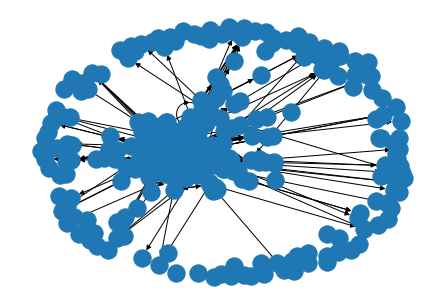

In [15]:
nx.draw(WG)

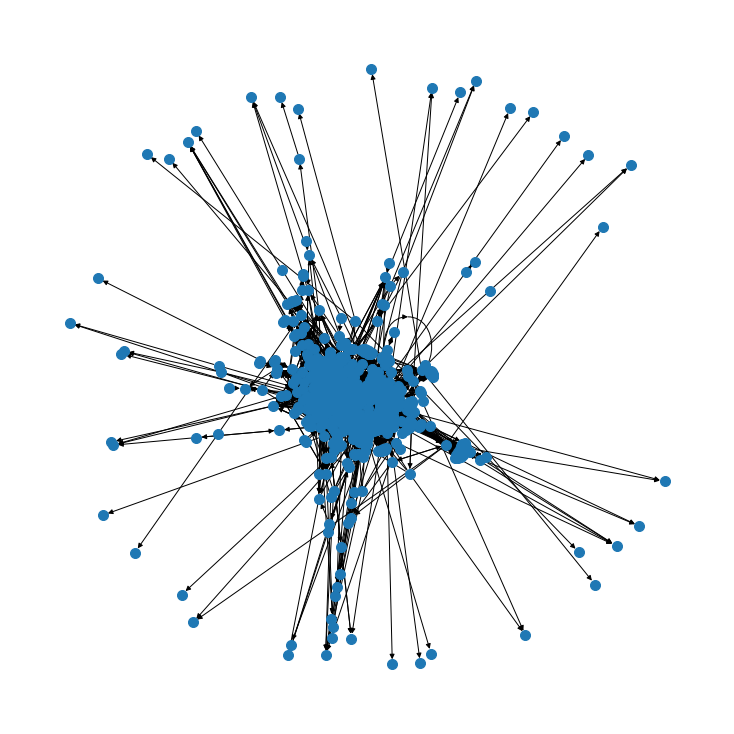

In [17]:
Gcc = sorted(nx.weakly_connected_components(WG), key=len, reverse=True)
G0 = WG.subgraph(Gcc[0])
plt.figure(figsize=(10,10))
nx.draw(G0, node_size=100)

In [52]:
G0.number_of_edges()

2676

In [42]:
from fa2 import ForceAtlas2
import plotly.graph_objects as go

In [38]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G0, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:16<00:00, 124.64it/s]BarnesHut Approximation  took  4.06  seconds
Repulsion forces  took  10.51  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  0.07  seconds
AdjustSpeedAndApplyForces step  took  0.45  seconds



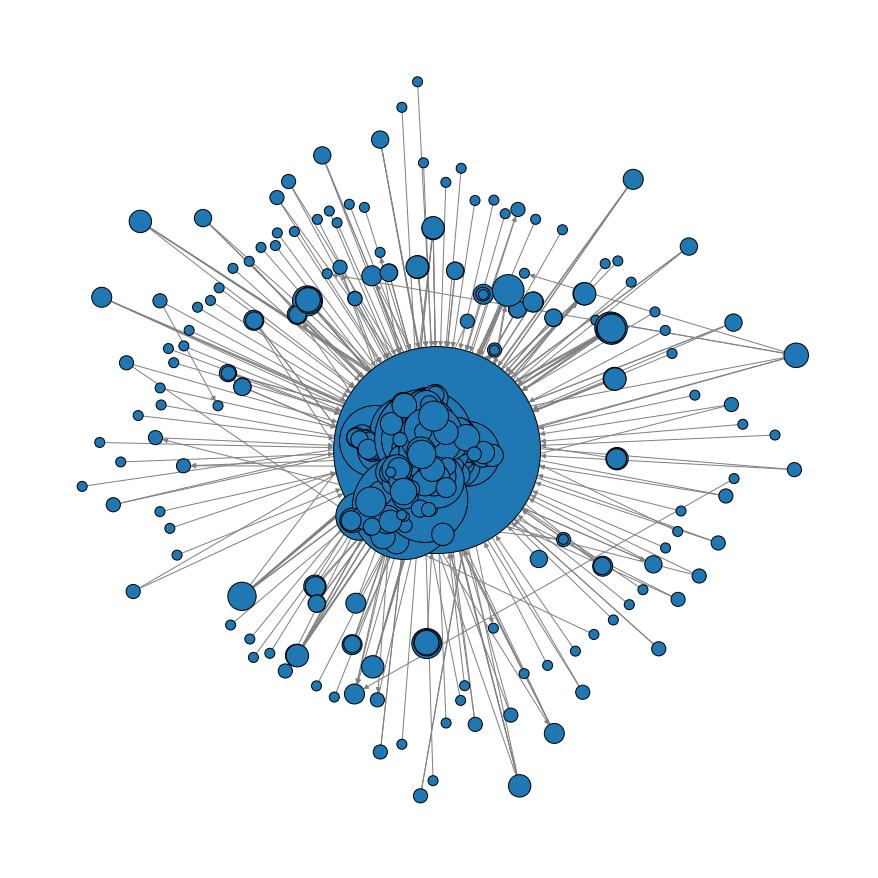

In [39]:
d = dict(G0.degree())

plt.figure(figsize=(12,12))

nx.draw(G0, positions, node_size=[v * 100 for v in d.values()], edge_color = 'grey') #Set size according to degree
        #node_color = nx.get_node_attributes(G0, 'color').values(), \ #Set node color according to color attribute
        #edge_color = 'grey') #Set edge color to grey to better focus on nodes and not disturb the view
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") #Ensure that the nodes have black edges

In [50]:
pos = nx.spring_layout(G0)

In [51]:
pos

{'Innkeeper': array([ 0.11055078, -0.02010693]),
 'The Witcher journal character entries': array([ 0.04378004, -0.00220835]),
 'Abigail': array([-0.02425709,  0.03042295]),
 'Adalbert (soldier)': array([-0.03840666, -0.00091902]),
 'Adam (Murky Waters)': array([-0.08598828,  0.03359138]),
 'Adda the White': array([-0.0552592 , -0.08917885]),
 'Alina': array([-0.10131189,  0.03494821]),
 'Alvin': array([-0.05356267,  0.04354425]),
 'Angus': array([-0.02470046,  0.09609296]),
 'Antoinette': array([ 0.01044887, -0.12384661]),
 'Armorer': array([-0.07716437,  0.01670583]),
 'Azar Javed': array([ 0.0415167 , -0.10609201]),
 'Berengar': array([0.25969544, 0.23256829]),
 'Blacksmith': array([-0.01045253, -0.06625634]),
 "Blacksmith's son": array([ 0.10253176, -0.07443706]),
 "Blacksmith's wife": array([ 0.01031398, -0.02944373]),
 'Blue-eyed lass': array([-0.01105835,  0.19434108]),
 'Bogut Kuternoga': array([ 0.49978822, -0.72005701]),
 'Boholt': array([-0.03505289, -0.04973998]),
 'Bootblac

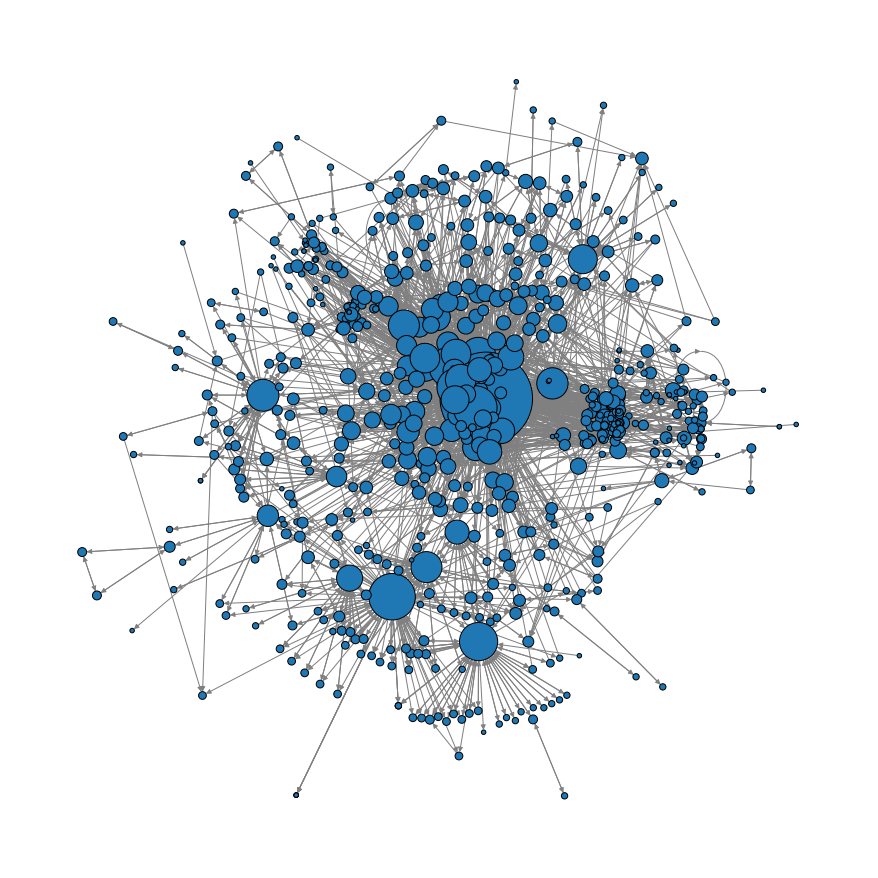

In [49]:
plt.figure(figsize=(12,12))
nx.draw_kamada_kawai(G0, node_size=[v * 20 for v in d.values()], edge_color = 'grey')
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") #Ensure that the nodes have black edges

In [43]:
G = nx.random_geometric_graph(200, 0.125)
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [44]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G0.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.marker.size = node_adjacencies
node_trace.text = node_text

In [45]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [76]:
G0

In [89]:
import pickle
with open("WG.pickle", 'wb') as f:
    pickle.dump(WG, f)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=061c6de9-714b-4aa5-8dca-7fde3082e296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>